## Data Manipulation

### Domain – HR

Focus – Insights from data

### 1. Compute how much total salary cost has increased from year 2011 to 2014.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/Salaries.csv")
df.head()

C:\Users\sahil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [9]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148643,148646,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148644,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148645,148649,Leon Walker,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148646,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148647,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,PT


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148648 entries, 0 to 148647
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148648 non-null  int64  
 1   EmployeeName      148648 non-null  object 
 2   JobTitle          148648 non-null  object 
 3   BasePay           148043 non-null  float64
 4   OvertimePay       148648 non-null  float64
 5   OtherPay          148648 non-null  float64
 6   Benefits          112490 non-null  float64
 7   TotalPay          148648 non-null  float64
 8   TotalPayBenefits  148648 non-null  float64
 9   Year              148648 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148648 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [20]:
salary_by_year = df.groupby('Year').sum()['TotalPayBenefits']
salary_by_year

Year
2011    2.594113e+09
2012    3.696790e+09
2013    3.814772e+09
2014    3.821866e+09
Name: TotalPayBenefits, dtype: float64

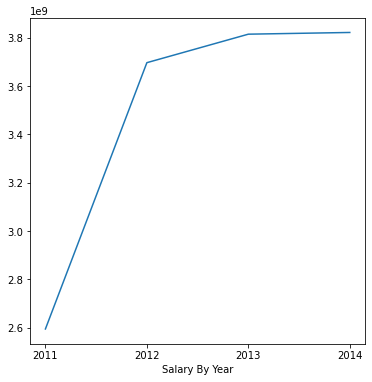

In [34]:
plt.figure(figsize = (6,6))
plt.plot(salary_by_year)
plt.xticks([2011,2012,2013,2014])
plt.xlabel("Salary By Year")
plt.show()

In [29]:
mean_salary = df.groupby('Year').mean()['TotalPayBenefits']
mean_salary

Year
2011     71743.819645
2012    100551.886807
2013    101440.519714
2014    100261.438668
Name: TotalPayBenefits, dtype: float64

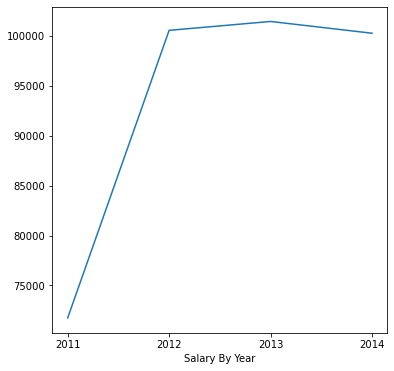

In [35]:
plt.figure(figsize = (6,6))
plt.plot(mean_salary)
plt.xticks([2011,2012,2013,2014])
plt.xlabel("Salary By Year")
plt.show()

**Salary cost has increased from year 2011 to 2014.**

---

### 2. Which Job Title in Year 2014 has highest mean salary?

In [59]:
job_title = df.groupby(['Year','JobTitle']).mean()['TotalPayBenefits']
job_title.tail()

Year  JobTitle                      
2014  Wire Rope Cable Maint Sprv        228338.090000
      Worker's Comp Supervisor 1         76964.451667
      Worker's Compensation Adjuster     97213.493846
      X-Ray Laboratory Aide              68754.120000
      Youth Comm Advisor                 52011.190000
Name: TotalPayBenefits, dtype: float64

**The 'Wire Rope Cable Maint Sprv' has the highest mean salary in Year 2014.**

---

### 3. How much money could have been saved in Year 2014 by stopping OverTimePay?

In [74]:
over_pay = df.groupby('Year').sum()['OvertimePay']
round(over_pay,1)

Year
2011    163819110.9
2012    184665045.5
2013    198621428.3
2014    205918599.3
Name: OvertimePay, dtype: float64

**By Stopping OvertimePay we could've saved ~205918599.3.**

---

### 4. Which are the top 5 common job in Year 2014 and how much do they cost SFO?

In [77]:
top_job_title = df[df['Year'] == 2014]['JobTitle'].value_counts().head(5)
print(top_job_title)
print("\n\nThese are the top 5 common jobs in Year 2014")

Transit Operator                2479
Special Nurse                   1478
Registered Nurse                1234
Public Svc Aide-Public Works     916
Firefighter                      815
Name: JobTitle, dtype: int64


These are the top 5 common jobs in Year 2014


In [86]:
sum_cost = 0
for index,value in top_job_title.iteritems():
    print('{}: {}\n'.format(index,value))
    sum_cost += sum(df[(df['Year']== 2014) & (df['JobTitle'] == index)]['TotalPayBenefits'])

print ("Total Cost of Top 5 Jobs in Year 2014: \t{}".format(round(sum_cost,3)))

Transit Operator: 2479

Special Nurse: 1478

Registered Nurse: 1234

Public Svc Aide-Public Works: 916

Firefighter: 815

Total Cost of Top 5 Jobs in Year 2014: 	610269227.66


---

### 5. Who was the top earning employee across all the years?

In [104]:
top_emp = df.groupby('EmployeeName').sum()['TotalPayBenefits']

print("Top earning employee is \n\n{}".format(top_emp.sort_values(axis=0).tail(1)))

Top earning employee is 

EmployeeName
Kevin Lee    1778487.17
Name: TotalPayBenefits, dtype: float64


**Top earning employee is Kevin Lee.**

---